### Recognition of Actors using PCA and SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

%matplotlib inline

In [3]:
# pip install scikit-image

In [4]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
dwane_jhonson=os.listdir("C:/Users/Admin/AI - CSE/Dwane jhonson")

In [6]:
ryan_ronalds=os.listdir("C:/Users/Admin/AI - CSE/Ryan Ronalds")

In [7]:
rdj=os.listdir("C:/Users/Admin/AI - CSE/robert downety junior")

In [8]:
#b2-reading image as a matrix of number

limit=10
dj_image=[None]*limit
j=0
for i in dwane_jhonson:
    if(j<limit):
        dj_image[j]=imread("C:/Users/Admin/AI - CSE/Dwane jhonson/"+i)
        j+=1
    else:
        break

In [9]:
limit=10
rr_image=[None]*limit  
j=0
for i in ryan_ronalds:
    if(j<limit):
        rr_image[j]=imread("C:/Users/Admin/AI - CSE/Ryan Ronalds/"+i)
        j+=1
    else:
        break

In [10]:
limit=10
rdj_image=[None]*limit
j=0
for i in rdj:
    if(j<limit):
        rdj_image[j]=imread("C:/Users/Admin/AI - CSE/robert downety junior/"+i)
        j+=1
    else:
        break

In [11]:
# convert the img into gray scale

dj_gray=[None]*limit
j=0
for i in  dj_image:
    if(j<limit):
        dj_gray[j]=rgb2gray(dj_image[j])
        j+=1
    else:
        break

In [12]:
rr_gray=[None]*limit
j=0
for i in  rr_image:
    if(j<limit):
        rr_gray[j]=rgb2gray(rr_image[j])
        j+=1
    
    else:
        break

In [13]:
rdj_gray=[None]*limit
j=0
for i in  rdj_image:
    if(j<limit):
        rdj_gray[j]=rgb2gray(rdj_image[j])
        j+=1
    
    else:
        break

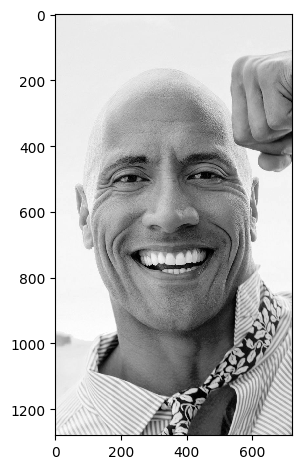

In [14]:
imshow(dj_gray[1])

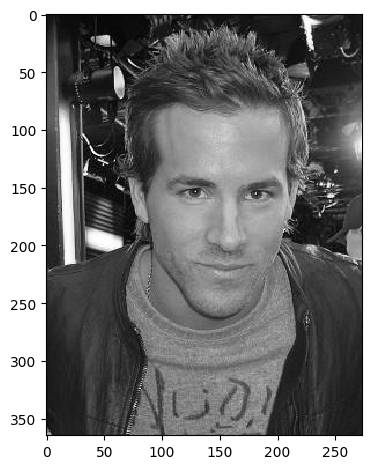

In [15]:
imshow(rr_gray[1])

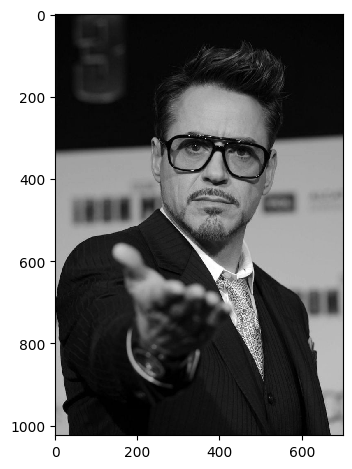

In [16]:
imshow(rdj_gray[1])

In [19]:
# matrix resizing

for j in range(10):
    dj_re=dj_gray[j]
    dj_gray[j]=resize(dj_re,(500,500))

In [20]:
for j in range(10):
    rr_re=rr_gray[j]
    rr_gray[j]=resize(rr_re,(500,500))

In [21]:
for j in range(10):
    rdj_re=rdj_gray[j]
    rdj_gray[j]=resize(rdj_re,(500,500))

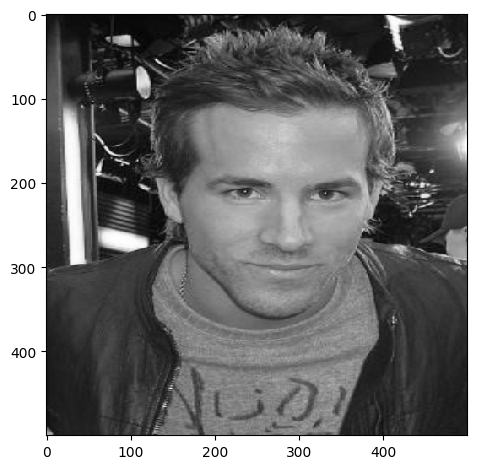

In [23]:
imshow(rr_gray[1])

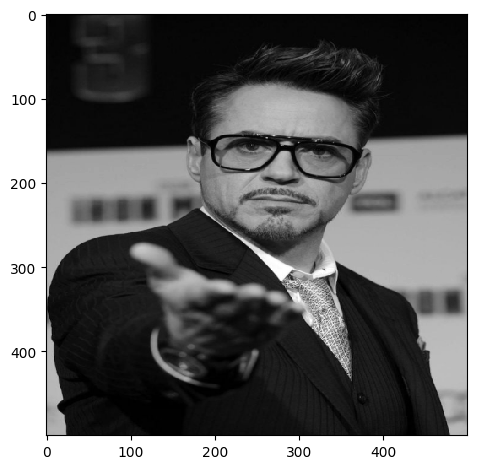

In [24]:
imshow(rdj_gray[1])

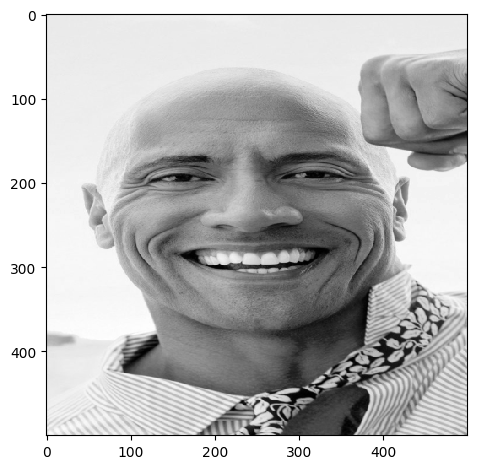

In [25]:
imshow(dj_gray[1])

In [35]:
len_of_image_dj=len(dj_gray)
len_of_image_dj

10

In [36]:
len_of_image_rr=len(rr_gray)
len_of_image_rr

10

In [37]:
len_of_image_rdj=len(rdj_gray)
len_of_image_rdj

10

In [28]:
# flatten the image

image_size_dj=dj_gray[2].shape
image_size_dj

(500, 500)

In [29]:
image_size_rr=rr_gray[2].shape
image_size_rr

(500, 500)

In [30]:
image_size_rdj=rdj_gray[2].shape
image_size_rdj

(500, 500)

In [32]:
flatten_size_dj=image_size_dj[0]*image_size_dj[1]
flatten_size_dj # multiplication of 500 and 500

250000

In [33]:
flatten_size_rr=image_size_rr[0]*image_size_rr[1]
flatten_size_rr # multiplication of 500 and 500

250000

In [34]:
flatten_size_rdj=image_size_rdj[0]*image_size_rdj[1]
flatten_size_rdj # multiplication of 500 and 500

250000

In [39]:
# now flatten the image from (500,500) marrix to 250000,1 vector

for i in range(len_of_image_dj):
    dj_gray[i]=np.ndarray.flatten(dj_gray[1]).reshape(flatten_size_dj,1)

In [40]:
for i in range(len_of_image_rr):
    rr_gray[i]=np.ndarray.flatten(rr_gray[1]).reshape(flatten_size_rr,1)

In [41]:
for i in range(len_of_image_rdj):
    rdj_gray[i]=np.ndarray.flatten(rdj_gray[1]).reshape(flatten_size_rdj,1)

In [45]:
# now stack the individual images array element into one array

dj_gray=np.dstack(dj_gray)
dj_gray.shape

(1, 10, 250000)

In [46]:
rr_gray=np.dstack(rr_gray)
rr_gray.shape

(1, 10, 250000)

In [47]:
rdj_gray=np.dstack(rdj_gray)
rdj_gray.shape

(1, 10, 250000)

In [48]:
# now if needed change the axis of the array elements

dj_gray=np.rollaxis(dj_gray,axis=2,start=0)
dj_gray.shape

(250000, 1, 10)

In [49]:
rr_gray=np.rollaxis(rr_gray,axis=2,start=0)
rr_gray.shape

(250000, 1, 10)

In [50]:
rdj_gray=np.rollaxis(rdj_gray,axis=2,start=0)
rdj_gray.shape

(250000, 1, 10)

In [51]:
dj_gray=dj_gray.reshape(len_of_image_dj,flatten_size_dj)
dj_gray.shape

(10, 250000)

In [52]:
rr_gray=rr_gray.reshape(len_of_image_rr,flatten_size_rr)
rr_gray.shape

(10, 250000)

In [53]:
rdj_gray=rdj_gray.reshape(len_of_image_rdj,flatten_size_rdj)
rdj_gray.shape

(10, 250000)

In [54]:
dj_data=pd.DataFrame(dj_gray)
dj_data

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203
1,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,...,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336
2,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,...,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833
3,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,...,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837
4,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,...,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850
5,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,...,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760
6,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,...,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796
7,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,...,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164
8,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,...,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985
9,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,...,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639


In [55]:
rr_data=pd.DataFrame(rr_gray)
rr_data

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,0.068018,0.068018,0.068018,0.068018,0.068018,0.068018,0.068018,0.068018,0.068018,0.068018,...,0.151005,0.151005,0.151005,0.151005,0.151005,0.151005,0.151005,0.151005,0.151005,0.151005
1,0.222124,0.222124,0.222124,0.222124,0.222124,0.222124,0.222124,0.222124,0.222124,0.222124,...,0.325843,0.325843,0.325843,0.325843,0.325843,0.325843,0.325843,0.325843,0.325843,0.325843
2,0.331440,0.331440,0.331440,0.331440,0.331440,0.331440,0.331440,0.331440,0.331440,0.331440,...,0.955951,0.955951,0.955951,0.955951,0.955951,0.955951,0.955951,0.955951,0.955951,0.955951
3,0.292656,0.292656,0.292656,0.292656,0.292656,0.292656,0.292656,0.292656,0.292656,0.292656,...,0.322110,0.322110,0.322110,0.322110,0.322110,0.322110,0.322110,0.322110,0.322110,0.322110
4,0.216923,0.216923,0.216923,0.216923,0.216923,0.216923,0.216923,0.216923,0.216923,0.216923,...,0.232189,0.232189,0.232189,0.232189,0.232189,0.232189,0.232189,0.232189,0.232189,0.232189
5,0.156457,0.156457,0.156457,0.156457,0.156457,0.156457,0.156457,0.156457,0.156457,0.156457,...,0.265817,0.265817,0.265817,0.265817,0.265817,0.265817,0.265817,0.265817,0.265817,0.265817
6,0.165661,0.165661,0.165661,0.165661,0.165661,0.165661,0.165661,0.165661,0.165661,0.165661,...,0.235527,0.235527,0.235527,0.235527,0.235527,0.235527,0.235527,0.235527,0.235527,0.235527
7,0.164350,0.164350,0.164350,0.164350,0.164350,0.164350,0.164350,0.164350,0.164350,0.164350,...,0.148709,0.148709,0.148709,0.148709,0.148709,0.148709,0.148709,0.148709,0.148709,0.148709
8,0.112407,0.112407,0.112407,0.112407,0.112407,0.112407,0.112407,0.112407,0.112407,0.112407,...,0.123774,0.123774,0.123774,0.123774,0.123774,0.123774,0.123774,0.123774,0.123774,0.123774
9,0.081595,0.081595,0.081595,0.081595,0.081595,0.081595,0.081595,0.081595,0.081595,0.081595,...,0.122254,0.122254,0.122254,0.122254,0.122254,0.122254,0.122254,0.122254,0.122254,0.122254


In [56]:
rdj_data=pd.DataFrame(rdj_gray)
rdj_data

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,0.038685,0.038685,0.038685,0.038685,0.038685,0.038685,0.038685,0.038685,0.038685,0.038685,...,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451
1,0.047230,0.047230,0.047230,0.047230,0.047230,0.047230,0.047230,0.047230,0.047230,0.047230,...,0.035294,0.035294,0.035294,0.035294,0.035294,0.035294,0.035294,0.035294,0.035294,0.035294
2,0.072699,0.072699,0.072699,0.072699,0.072699,0.072699,0.072699,0.072699,0.072699,0.072699,...,0.543459,0.543459,0.543459,0.543459,0.543459,0.543459,0.543459,0.543459,0.543459,0.543459
3,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,...,0.657193,0.657193,0.657193,0.657193,0.657193,0.657193,0.657193,0.657193,0.657193,0.657193
4,0.644893,0.644893,0.644893,0.644893,0.644893,0.644893,0.644893,0.644893,0.644893,0.644893,...,0.678220,0.678220,0.678220,0.678220,0.678220,0.678220,0.678220,0.678220,0.678220,0.678220
5,0.666108,0.666108,0.666108,0.666108,0.666108,0.666108,0.666108,0.666108,0.666108,0.666108,...,0.696974,0.696974,0.696974,0.696974,0.696974,0.696974,0.696974,0.696974,0.696974,0.696974
6,0.682421,0.682421,0.682421,0.682421,0.682421,0.682421,0.682421,0.682421,0.682421,0.682421,...,0.645752,0.645752,0.645752,0.645752,0.645752,0.645752,0.645752,0.645752,0.645752,0.645752
7,0.311886,0.311886,0.311886,0.311886,0.311886,0.311886,0.311886,0.311886,0.311886,0.311886,...,0.740981,0.740981,0.740981,0.740981,0.740981,0.740981,0.740981,0.740981,0.740981,0.740981
8,0.719870,0.719870,0.719870,0.719870,0.719870,0.719870,0.719870,0.719870,0.719870,0.719870,...,0.612325,0.612325,0.612325,0.612325,0.612325,0.612325,0.612325,0.612325,0.612325,0.612325
9,0.716002,0.716002,0.716002,0.716002,0.716002,0.716002,0.716002,0.716002,0.716002,0.716002,...,0.700063,0.700063,0.700063,0.700063,0.700063,0.700063,0.700063,0.700063,0.700063,0.700063


In [57]:
dj_data['label']='Dwane Jhonson'
dj_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203,0.867203,Dwane Jhonson
1,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,0.926792,...,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336,0.324336,Dwane Jhonson
2,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,0.927620,...,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833,0.277833,Dwane Jhonson
3,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,0.932925,...,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837,0.957837,Dwane Jhonson
4,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,0.954185,...,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850,0.964850,Dwane Jhonson
5,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,0.965079,...,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760,0.964760,Dwane Jhonson
6,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,0.968435,...,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796,0.818796,Dwane Jhonson
7,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,0.969282,...,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164,0.750164,Dwane Jhonson
8,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,0.898470,...,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985,0.886985,Dwane Jhonson
9,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,0.914307,...,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639,0.593639,Dwane Jhonson
